In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os

from pathlib import Path

import motorlab as ml
import numpy as np
import seaborn as sns

In [3]:
os.chdir(Path().resolve().parent)

In [6]:
def get_config(experiment="gbyk"):
    if experiment == "gbyk":
        sessions = [
            "bex_20230621_spikes_sorted_SES",  # before
            "bex_20230624_spikes_sorted_SES",  # before
            "bex_20230629_spikes_sorted_SES",  # before
            "bex_20230630_spikes_sorted_SES",  # before
            "bex_20230701_spikes_sorted_SES",  # before
            "bex_20230708_spikes_sorted_SES",  # while
            "ken_20230614_spikes_sorted_SES",  # while and before
            "ken_20230618_spikes_sorted_SES",  # before
            "ken_20230622_spikes_sorted_SES",  # while, before and free
            "ken_20230629_spikes_sorted_SES",  # while, before and free
            "ken_20230630_spikes_sorted_SES",  # while
            "ken_20230701_spikes_sorted_SES",  # before
            "ken_20230703_spikes_sorted_SES",  # while
        ]
    else:
        sessions = [
            "bex_20230221",
            "bex_20230222",
            "bex_20230223",
            "bex_20230224",
            "bex_20230225",
            "bex_20230226",
            "jon_20230125",
            "jon_20230126",
            "jon_20230127",
            "jon_20230130",
            "jon_20230131",
            "jon_20230202",
            "jon_20230203",
            "luk_20230126",
            "luk_20230127",
            "luk_20230130",
            "luk_20230131",
            "luk_20230202",
            "luk_20230203",
        ]

    config = {
        "DATA_DIR": f"data/{experiment}",
        "CHECKPOINT_DIR": "checkpoint/pose_to_spike_count",
        "CONFIG_DIR": "config/pose_to_spike_count",
        "save": True,
        "experiment": experiment,
        "seed": 0,
        "homing": True,
        "filter": False,
        "in_modalities": "poses",
        "out_modalities": "spike_count",
        "architecture": "gru",
        "sessions": sessions,
        "body_repr": "egocentric",
        "loss_fn": "poisson",
        "metric": "correlation",
        "model": {
            "embedding_dim": 256,
            "hidden_dim": 256,
            "n_layers": 1,
            "readout": "softplus",
        },
        "train": {"n_epochs": 100, "lr": 3e-3},
        "track": {"metrics": True, "wandb": False, "checkpoint": True},
    }
    return config

In [7]:
ml.model.train(get_config())

uid: 20250625113801
GRUModel(
  (embedding): LinearEmbedding(
    (linear): ModuleDict(
      (bex_20230621_spikes_sorted_SES): Linear(in_features=63, out_features=256, bias=True)
      (bex_20230624_spikes_sorted_SES): Linear(in_features=63, out_features=256, bias=True)
      (bex_20230629_spikes_sorted_SES): Linear(in_features=63, out_features=256, bias=True)
      (bex_20230630_spikes_sorted_SES): Linear(in_features=63, out_features=256, bias=True)
      (bex_20230701_spikes_sorted_SES): Linear(in_features=63, out_features=256, bias=True)
      (bex_20230708_spikes_sorted_SES): Linear(in_features=63, out_features=256, bias=True)
      (ken_20230614_spikes_sorted_SES): Linear(in_features=63, out_features=256, bias=True)
      (ken_20230618_spikes_sorted_SES): Linear(in_features=63, out_features=256, bias=True)
      (ken_20230622_spikes_sorted_SES): Linear(in_features=63, out_features=256, bias=True)
      (ken_20230629_spikes_sorted_SES): Linear(in_features=63, out_features=256, bia

/Users/caio/dev/motorlab/motorlab/metrics.py:89: RuntimeWarning: invalid value encountered in divide
  corr = numerator / denom


epoch: 0001 | local correlation: -0.0003 | global correlation: -0.0012
epoch: 0001 | loss: 1.4909 | grad_norm: 0.31426130 | local correlation: 0.0061 | global correlation: 0.1043
epoch: 0002 | loss: 1.4448 | grad_norm: 0.24479431 | local correlation: 0.0265 | global correlation: 0.1952
epoch: 0003 | loss: 1.4326 | grad_norm: 0.21592730 | local correlation: 0.0392 | global correlation: 0.2299
epoch: 0004 | loss: 1.4255 | grad_norm: 0.21427570 | local correlation: 0.0460 | global correlation: 0.2493
epoch: 0005 | loss: 1.4205 | grad_norm: 0.21388656 | local correlation: 0.0509 | global correlation: 0.2630
epoch: 0006 | loss: 1.4165 | grad_norm: 0.21747818 | local correlation: 0.0546 | global correlation: 0.2739
epoch: 0007 | loss: 1.4132 | grad_norm: 0.23308376 | local correlation: 0.0574 | global correlation: 0.2827
epoch: 0008 | loss: 1.4104 | grad_norm: 0.21901981 | local correlation: 0.0595 | global correlation: 0.2900
epoch: 0009 | loss: 1.4080 | grad_norm: 0.19132100 | local correl

In [ ]:
# ken_20230614
# run = None  # spike sorted: false

In [ ]:
# egocentric representation
run = 20250625104007  # homing: false
run = 20250625113801  # homing: true

In [ ]:
# run = None  # representation: egocentric
# run = None  # representation: centered
# run = None  # representation: allocentric

In [6]:
sessions = get_config()["sessions"]
# sessions = ["ken_20230614"]
DATA_DIR = Path("data/gbyk/")
CONFIG_PATH = Path(f"config/pose_to_spike_count/{run}.yaml")
eval_metrics, eval_preds, eval_gts = ml.model.evaluate(CONFIG_PATH)
global_corr = ml.metrics.global_correlation(eval_preds, eval_gts)
local_corr = ml.metrics.local_correlation(eval_preds, eval_gts)

/Users/caio/dev/motorlab/.mlab/lib/python3.13/site-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  warnings.warn(


GRUModel(
  (in_layer): LinearEmbedding(
    (embedding): ModuleDict(
      (bex_20230621_spikes_sorted_SES): Linear(in_features=63, out_features=256, bias=True)
      (bex_20230624_spikes_sorted_SES): Linear(in_features=63, out_features=256, bias=True)
      (bex_20230629_spikes_sorted_SES): Linear(in_features=63, out_features=256, bias=True)
      (bex_20230630_spikes_sorted_SES): Linear(in_features=63, out_features=256, bias=True)
      (bex_20230701_spikes_sorted_SES): Linear(in_features=63, out_features=256, bias=True)
      (bex_20230708_spikes_sorted_SES): Linear(in_features=63, out_features=256, bias=True)
      (ken_20230614_spikes_sorted_SES): Linear(in_features=63, out_features=256, bias=True)
      (ken_20230618_spikes_sorted_SES): Linear(in_features=63, out_features=256, bias=True)
      (ken_20230622_spikes_sorted_SES): Linear(in_features=63, out_features=256, bias=True)
      (ken_20230629_spikes_sorted_SES): Linear(in_features=63, out_features=256, bias=True)
      (ken

/Users/caio/dev/motorlab/motorlab/metrics.py:98: RuntimeWarning: invalid value encountered in divide
  corr = numerator / denom


In [10]:
areas = dict()
for session in sessions:
    areas[session] = np.load(
        Path(f"{DATA_DIR}/{session}/responses/meta/areas.npy")
    )
    areas[session] = np.where(
        np.char.startswith(areas[session], "M1"), "M1", areas[session]
    )
    areas[session] = np.where(
        np.char.startswith(areas[session], "PMd"), "PMd", areas[session]
    )

In [11]:
results = {"session": [], "area": [], "global_corr": [], "local_corr": []}
for session in sessions:
    results["session"].extend([session] * len(global_corr[session]))
    results["area"].extend(areas[session])
    results["global_corr"].extend(global_corr[session])
    results["local_corr"].extend(local_corr[session])

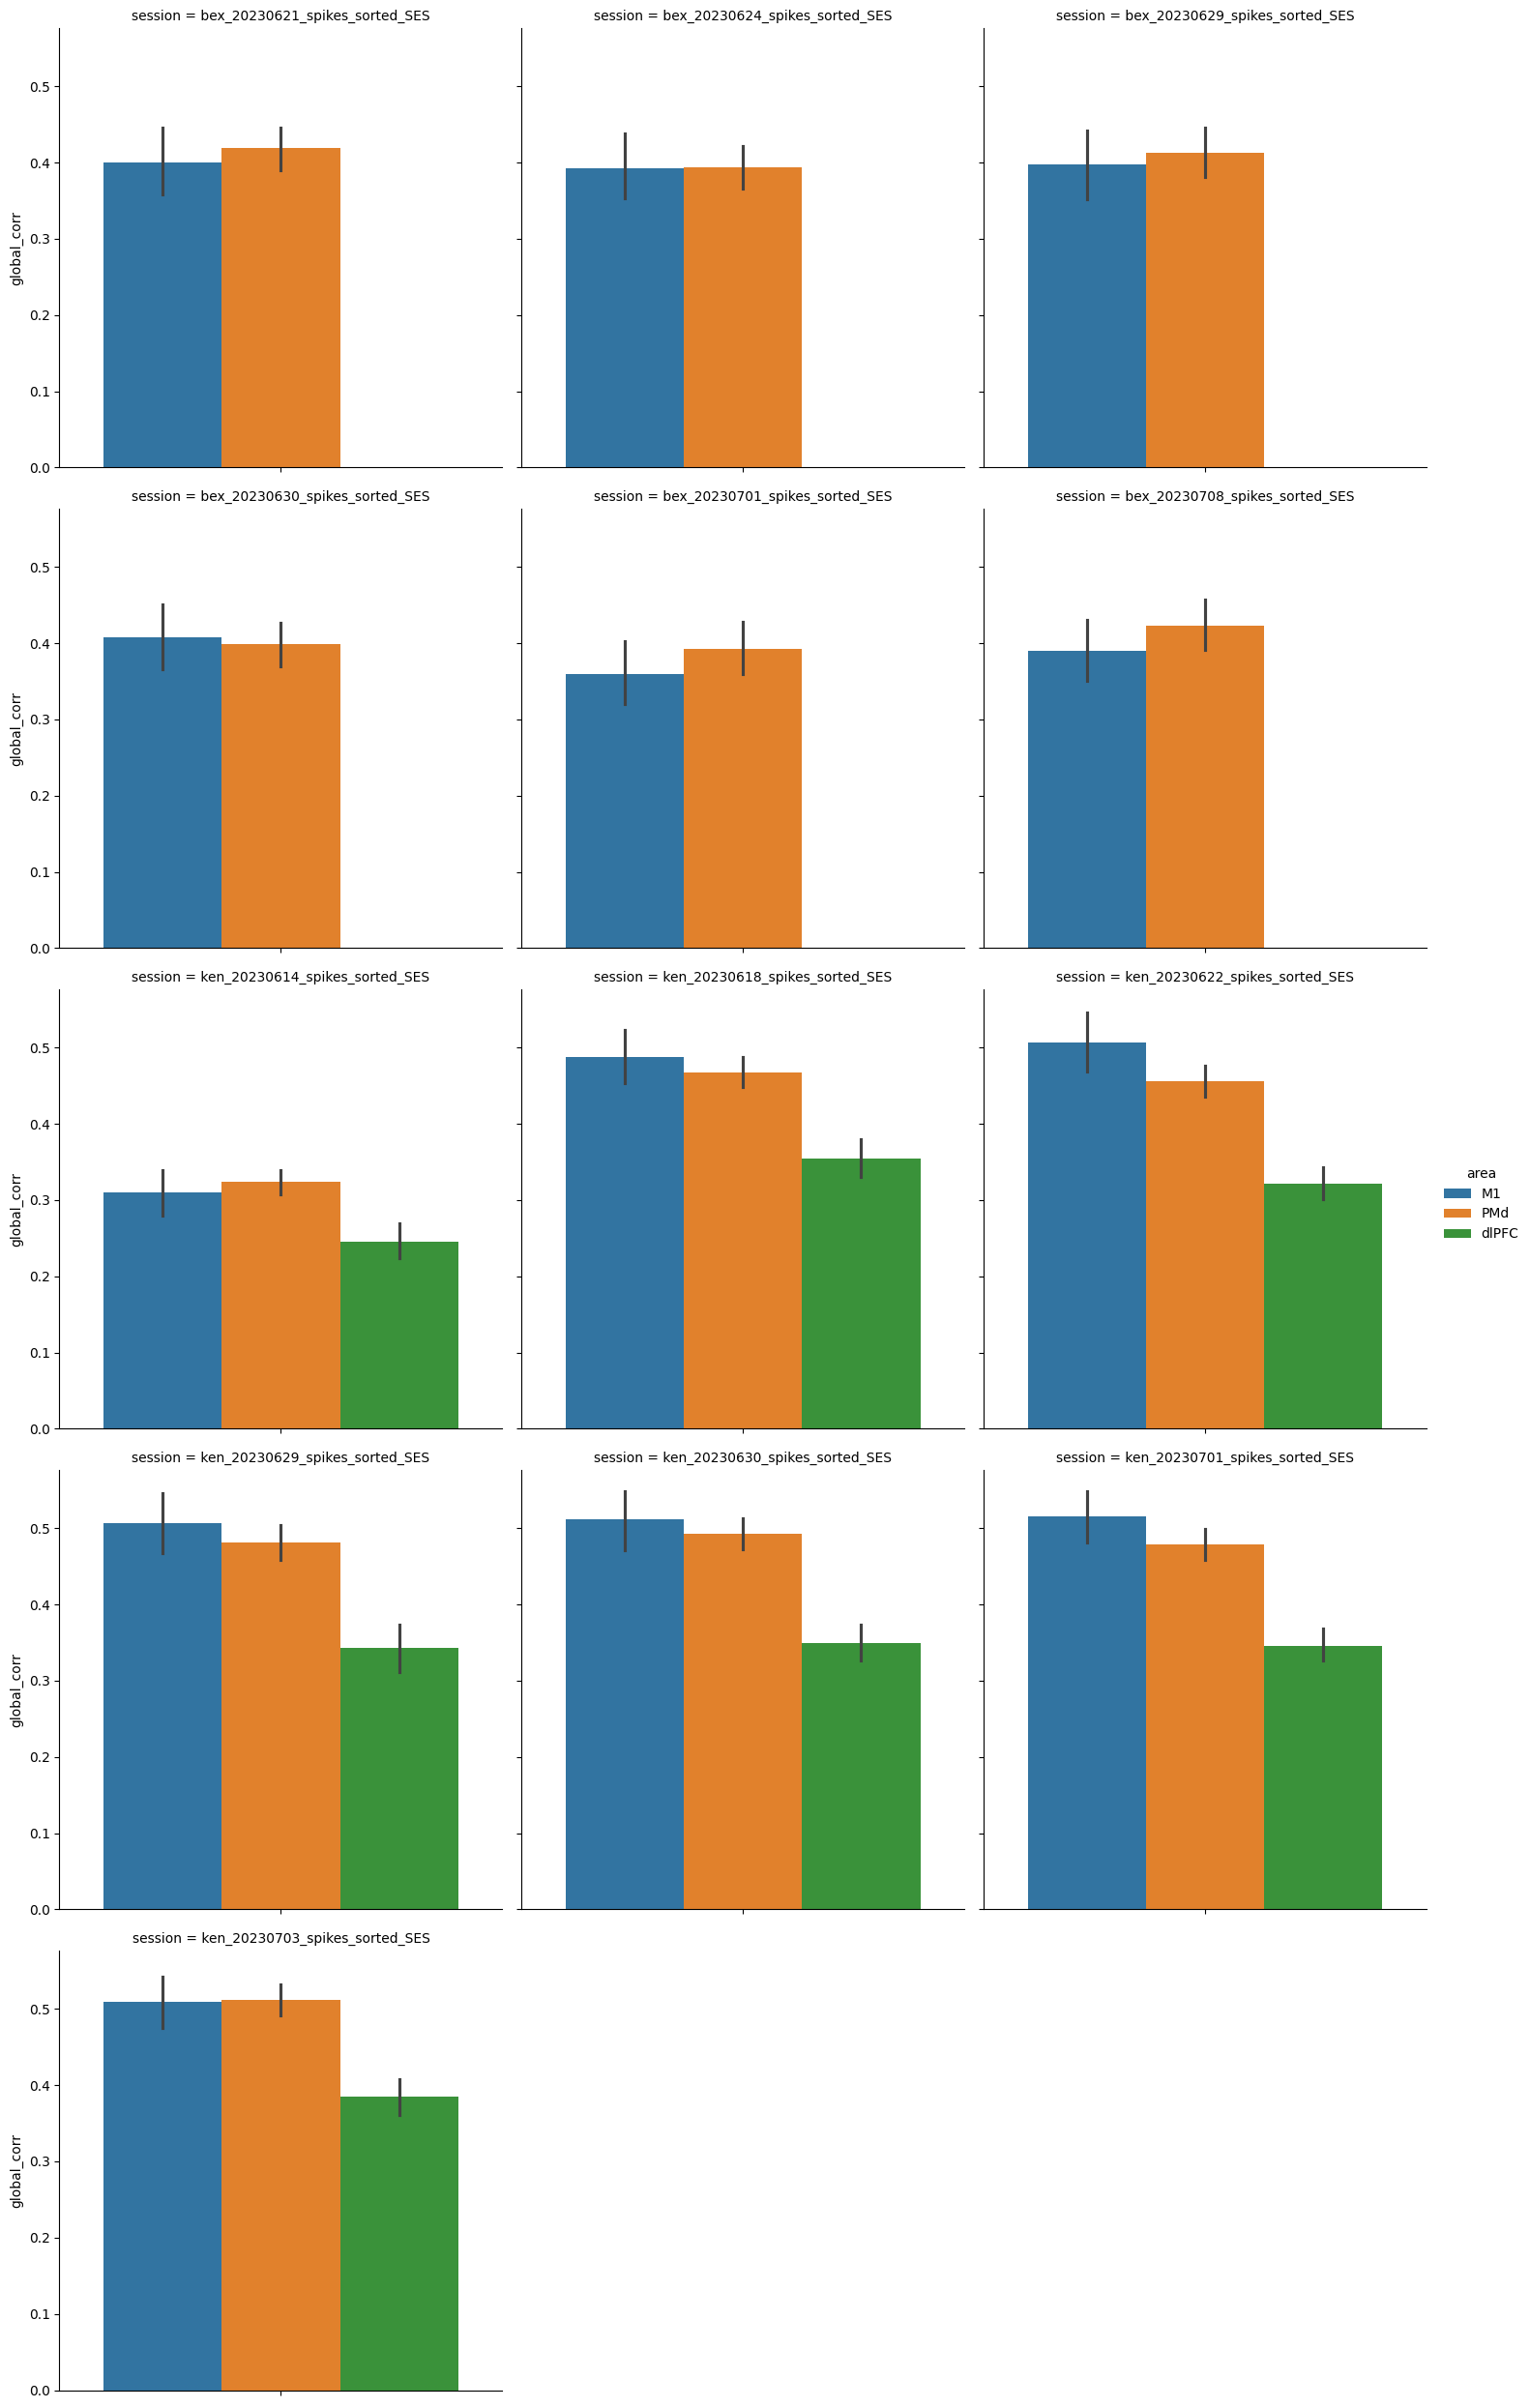

In [12]:
sns.catplot(
    data=results,
    hue="area",
    y="global_corr",
    col="session",
    kind="bar",
    col_wrap=3,
)

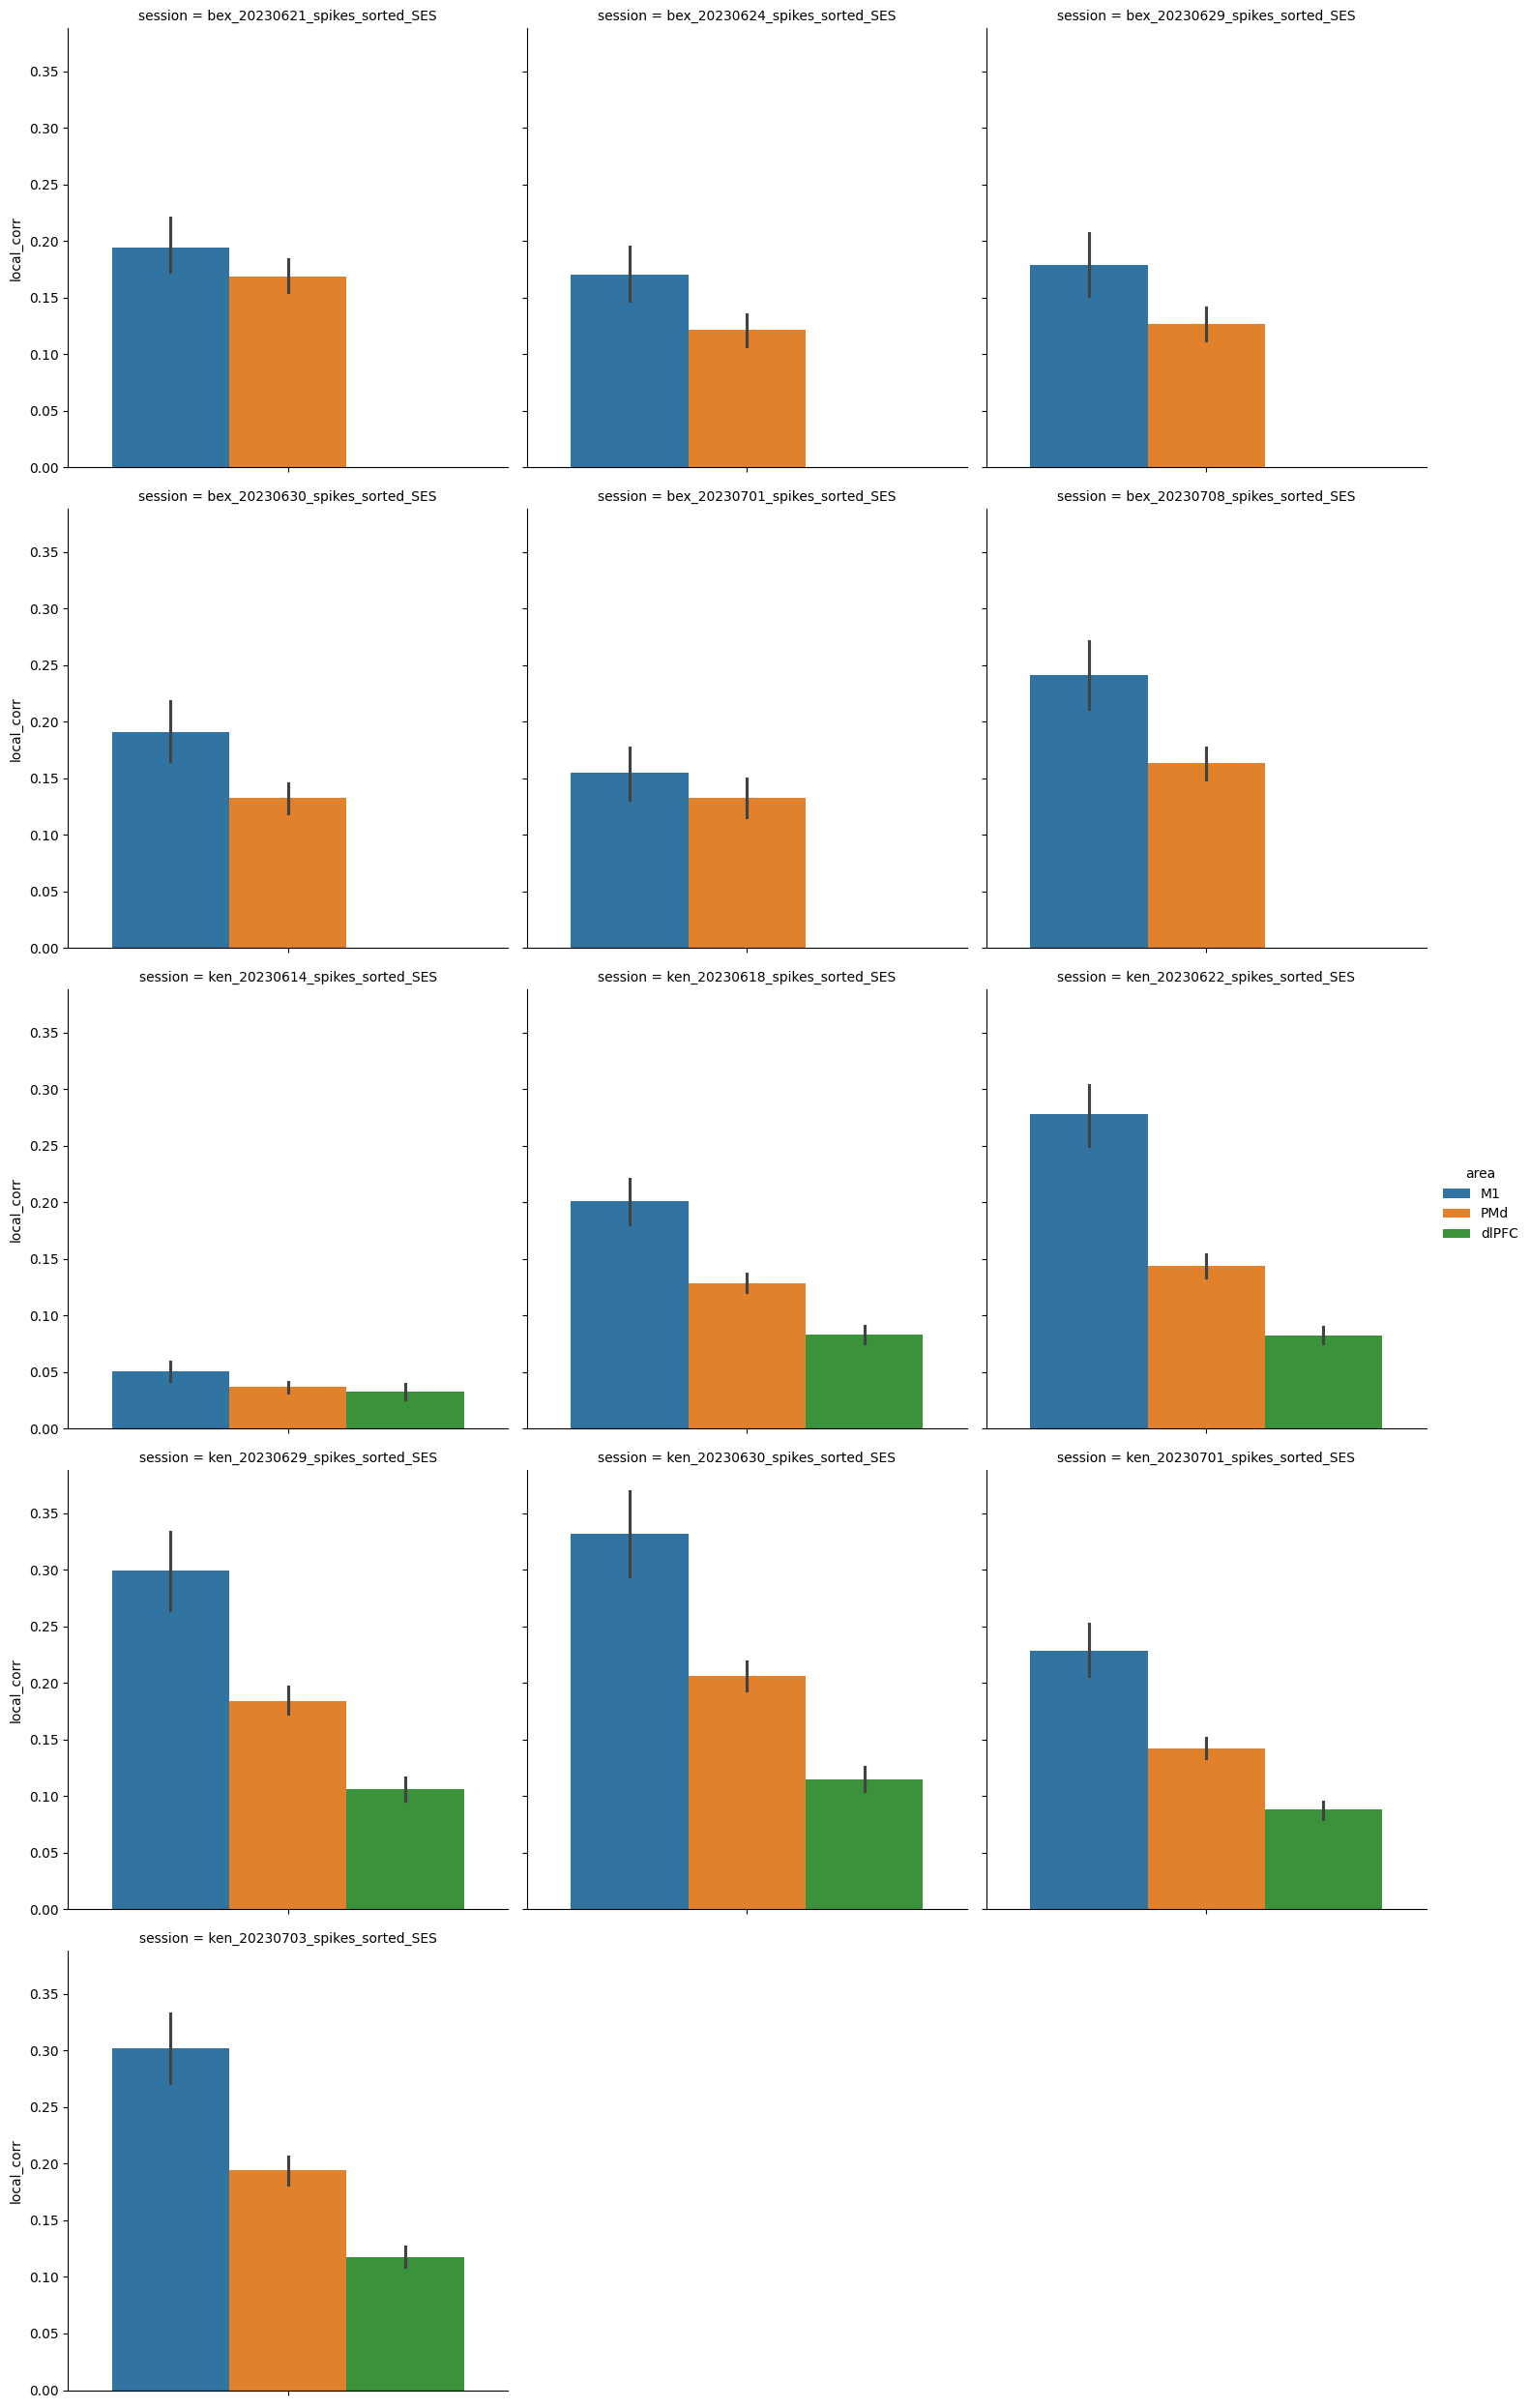

In [13]:
sns.catplot(
    data=results,
    hue="area",
    y="local_corr",
    col="session",
    kind="bar",
    col_wrap=3,
)